# GBDT (Gradient Boosted Decision Trees)

Q - So How This Will Work ?



Ans - So , Everytime we try to basically increase the accuracy . we always looks for tha highest accuracy but in Gradient Boosted we dont try to increase the accuracy rather we decrease the error .instead of increasing the accuracy we try to minimize the error , Reduce the error . If we reduce the error ,it means what you increase the accuracy .  We dont know wheather accuracy will increase or not but irrespective  of that our goal in the gbdt is to reduce the error . So remaining thing will take care itself in this way we try to reduce the error.





As an when we build a model (number of estimators , so every estimator should reduce the error . So lets Look into this How its works ! Very Simple Concept.






Gradient Boosted Trees -> Gradient Boosted Trees use decision Tree as estimator . It can work with different loss function(Regression,Classification,Risk Modelling etc.) Evaluate its gradient and approximate it with a simple tree (Stage Wisely , that Minimize the over all error)


Ada Boost is a Special Case of Gradient Boosted Tree that uses Exponential loss Function.





Q -  The algorithm :

- Calculate the average of the label column as intially this average shall minimise the total error.


- Calulate the pseudo residuals 

    -           Pseudo residual =actual label - the predicted result (Which is average in the first result)
    
- Mathematically,



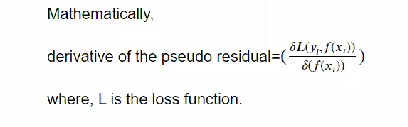





-> Here , The Gradient of the error term is getting calculated as the goal is to minimize the error . Hence the name Gradient Boosted Trees.






-> Create a tree to predict the pseudo residuals instead of a tree to predict for the actual column values .





-> New result = Previous result + Learning rate * residual.






Mathematically , f1(x) =f0 (x) + vΣy




Where V is the learning rate and Y is the residual





-> Repeat these steps until th residual stops decreasing .








Example - For Understanding This Algorithm we will use the following Simple Dat set for weight prediction.







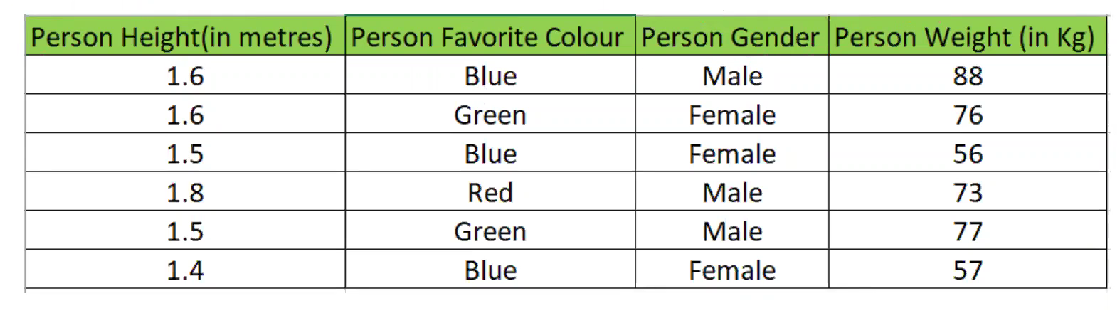





- For the first iteration , calculate the average of the target column (Weight here) as it minimizes the residual initially .



Average = (88+77+56+73+77+57 )=71.2








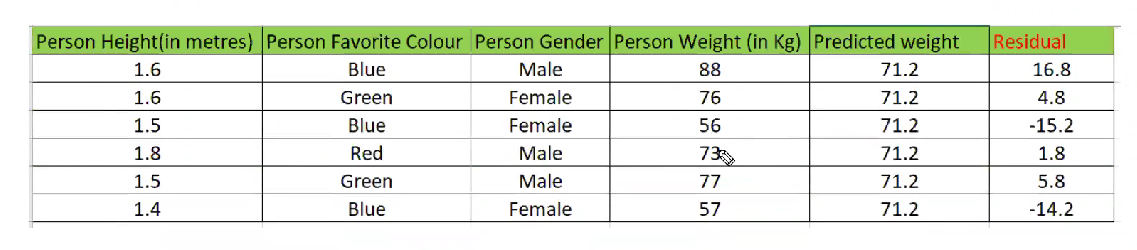




- We consider this as the first prediction adn then we will calculate the residual which is the difference between the predicted and the acutal value as show below :




- Now for prediction . We use the formula 



New Values  = Old Values + Learning Rate * Residual 




- If we considered the learning rate as 0.1 , Then result becomes 




New Value =71.2 + 0.1*16.8 =72.9


(For The First Row)





Similarly the new prdiction for all the row is calculated .







- The Above steps are repeated untill there is no significant improvement in residual or untill we reach number of estimators . 




# 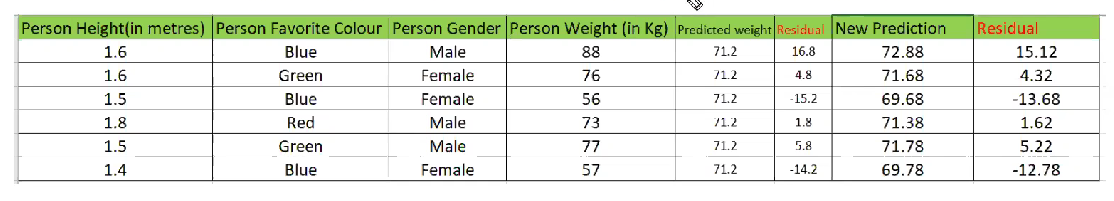




- The Final Result is given by :-

Final Value = First prediction + Learning Rate * 1st Residual + Learning Rate * 2nd residual + and So on i.e Final Value = 71.2 + (0.1 * 15.12)+(0.1 * 15.12)+(0.1*4.32)+(0.1*-13.68)+(0.1*1.62)+so on


# Lecture 31


GBDT -> Gradien Boosted Decision Trees we try to understand intution behind it and how its works as well with example . So it is going take mean of label and take one number. Then it find the residual only minus the getting mean and Actual mean then based in the residual again it is going to predict and again it will change the residual this process is keep continuing untill this process is keep continueing untill there is no scope of Emprovement or the number of estimator you have assigned getting over . So there are two possibilities which are come first and that moment is going to stop learning.

# Python Implementation

In [1]:
#Import Necessary Libraries

import numpy as np
import pandas as pd


#For DataVisualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style("White Grid")

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Checking isna()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#We dont have null values we are good to proceed

In [9]:
#Just find correlation of feature vs Target using corrwith.

In [10]:
df.drop('target',axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

(We are going to check correlation so, earlier we have used heatmap and things like that heatmap we used to scatter matrix used ,scatter plot we used . There are various technique we applied. So Here we are going to work differently , Some times what happen in heat map only show numbers and colors there could be possible that numbers you does not read properly some times you miss some color . Some numbers . i am noy saying always but some times its happen.)





I am going to use corrwith method what exactly it means that i am goping to get features . correlation with (corrwith) label . So we need a feature and label)






-> Visualize the correlation




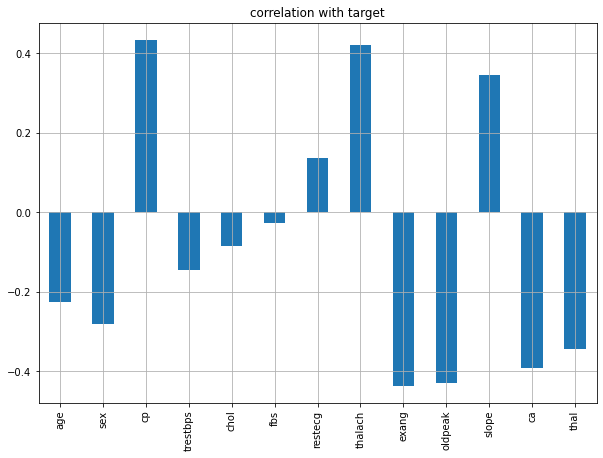

In [13]:
#Visualize the correlation
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True,figsize=(10,7),title='correlation with target')
plt.show()

I will always see correlationship we have learned in the statistics in correlation is closed to zero it means that there is no relationship.




- Lets work on feature selection and see if that can help us building better model.



- Model building Using Select Percentile Features .

In [14]:
from sklearn.feature_selection import SelectPercentile,chi2

When we apply chi2 . we get p-values for all features Based on the P-Values it will select to 80% of feature.



Example - If P value < 0.05 , it will rejecty null hypothesis . Default null hypothesis is there is no relation between feature and target.





- It is same as SelectKBest but SelectKBest we take how must Best feature we want but in this SelectPercentile we have to select how much percent best feature want .





-> Select Percentile is used chi square test for finding score




-> it is a feature selection  technique






-> So , based on p values we reject or failed to reject null hypothesis by default null hypothesis. Say there is no relationship between feature and label . So with this chi-square it going to get the p values and which ever p value is lowest we are going to keep on a top lowest the value highest the relationship because we are going to reject . if p-value is <0.05 we are going to reject it . if it is too less means there is rather close our relationship.

In [15]:
#instantiate selectpercentile and fit (feature ,label)
x=df.drop(['target'],axis=1)
y=df.target


spercentile =SelectPercentile(score_func=chi2,percentile=80)


spercentile=spercentile.fit(x,y)

In [18]:
#Separate the features to check p values 

cols=spercentile.get_support(indices=True)#to return index number instead of boolean
print('Feature Index = ',cols)

feature =x.columns[cols]

print('feature = ',list(feature))

Feature Index =  [ 0  1  2  3  4  7  8  9 10 11]
feature =  ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [20]:
df_scores=pd.DataFrame({'feature':x.columns,'chi2score':spercentile.scores_,'pvalue':spercentile.pvalues_})
df_scores.sort_values(by='chi2score',ascending=False)

,feature,chi2score,pvalue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


Lets print the 80% features

In [21]:
#Create subset of selected feature 
x=df[feature]
y=df.target

In [22]:
#Importing Libs 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.3,random_state=42)

# Gradient Boosting Classifier


In [26]:
from sklearn.ensemble import GradientBoostingClassifier



from sklearn.metrics import classification_report,accuracy_score

In [34]:
#write one fucntion and call as many times to check accuracy_score of different models 

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))

In [29]:
#Initiate Gradient Boosting Classifier()
gbdt=GradientBoostingClassifier()

In [30]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [37]:
#Call the function and pass dataset to check train and score .
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=True)
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=False)#This is for testing score .

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.8351648351648352
Classification Report==>                precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [38]:
#Lets Try of we can improve the performance of our  model using parameter tuning.


#HyperParamter Tuning


from sklearn.model_selection import GridSearchCV


In [40]:
grid_param={'max_depth':range(4,8,),'min_samples_split':range(2,8,2),'learning_rate':np.arange(0.1,0.3)}

grid = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [42]:
clf=GradientBoostingClassifier(max_depth=8,min_samples_split=2,learning_rate=0.1)


clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8)

In [43]:
#Call the function and pass dataset to check train and test score 
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=True)
metrics_score(gbdt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.8351648351648352
Classification Report==>                precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



# You Can Still Tune the Parameter with Different range and try to improve the score.

In [ ]:
#Student of DataSciecne 
#Student of DataTrained- Saurav
#Date - 26-09-2022
#Time - 9:25